# DATASET LOADING

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

target_names = iris.target_names
feature_names = iris.feature_names

print("feauture names: ",feature_names)
print("target names: ",target_names)

feauture names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names:  ['setosa' 'versicolor' 'virginica']


# DATASET SPLITTING

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)



# TRAIN THE MODEL

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors=3)
classifier_knn.fit(x_train,y_train)




KNeighborsClassifier(n_neighbors=3)

# PREDICTING VALUES

In [22]:
y_pred =classifier_knn.predict(x_test)

COMPARING ACTUAL RESPONSES VALUES(Y_TEST) WITH PREDICTED RESPONSE VALUE(Y_PRED)

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9777777777777777


In [16]:
#providing sample data and the model will make prediction out of that data

sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)

pred_species =[iris.target_names[p] for p in preds] 
print("predictions:",pred_species)

predictions: ['versicolor', 'virginica']


# MODEL PERSISTENCE
Once you train the model, it is desirable that the model should be persist for future use so 

that we do not need to retrain it again and again. It can be done with the help of dump and load features of joblib package.
Consider the example below in which we will be saving the above trained model 
(classifier_knn) for future use:

In [18]:
from sklearn.externals import joblib
joblib.dump(classifier_knn, 'iris_classifier_knn.joblib')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\HP\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)

The above code will save the model into file named iris_classifier_knn.joblib. Now, the 
object can be reloaded from the file with the help of following code:

In [1]:
joblib.load('iris_classifier_knn.joblib')

NameError: name 'joblib' is not defined

# AN EXAMPLE OF DECISION TREE WITH IRIS DATASET

versicolor
versicolor
accuracy score: 0.9555555555555556


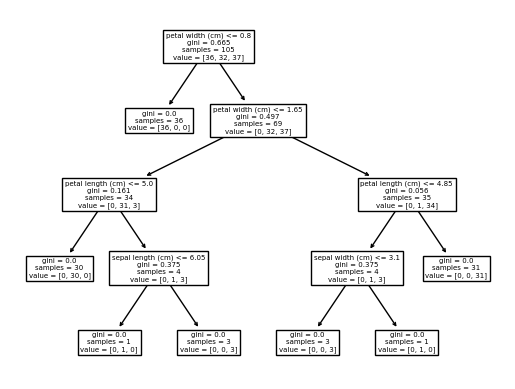

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# split the dataset
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state =1)


model = DecisionTreeClassifier()
model.fit(train_x,train_y)

predict = model.predict(test_x)
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
prediction = model.predict(sample)
for p in prediction:
    print(iris.target_names[p])
print(f"accuracy score: {metrics.accuracy_score(predict,test_y)}")

tree.plot_tree(model,feature_names=iris.feature_names)
plt.show()

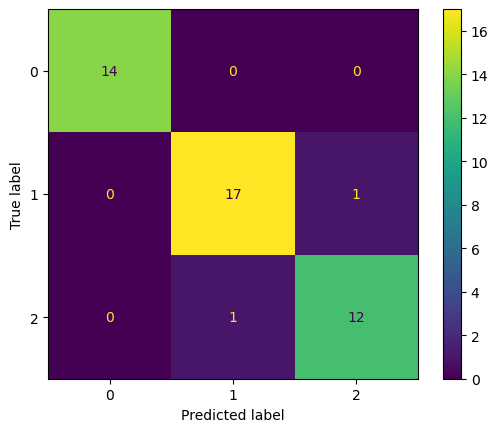

In [12]:
#the confusion matrix 
confusion_matrix = metrics.confusion_matrix(test_y,predict)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1,2])
confusion_matrix_display.plot()
plt.show()

In [10]:
import pandas as pd 

data = {
    'color' : ['red','green','blue','red','green']
}

df = pd.DataFrame(data)
one_hot_encoded = pd.get_dummies(df['color'],prefix='color')

df = pd.concat([df,one_hot_encoded],axis=1)
df = df.drop('color',axis=1)
print(df)

   color_blue  color_green  color_red
0       False        False       True
1       False         True      False
2        True        False      False
3       False        False       True
4       False         True      False


In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("housing.csv")
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


data Preprocessing

In [3]:
df.shape

(20640, 10)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#Replace Null values
meaner =df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(meaner,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
 df.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [27]:
#frequency encoding
freq = df['ocean_proximity'].value_counts(normalize=True)
df['ocean_proximity'] = df['ocean_proximity'].map(freq)
df.groupby('ocean_proximity').size()

ocean_proximity
0.000242       5
0.110950    2290
0.128779    2658
0.317393    6551
0.442636    9136
dtype: int64

In [29]:
#check for duplicates
df.duplicated().sum().sum()

0

In [6]:
#check for any null values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Dealing with outliers 
# Defining a functionn called plot_outliers to show outliers in my plots
# Defining a function called plot_hist to visualize and we will use it in visualizing the outliers

In [34]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data =df , x =col)
    ax.set(xlabel='')
    plt.show()
def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();


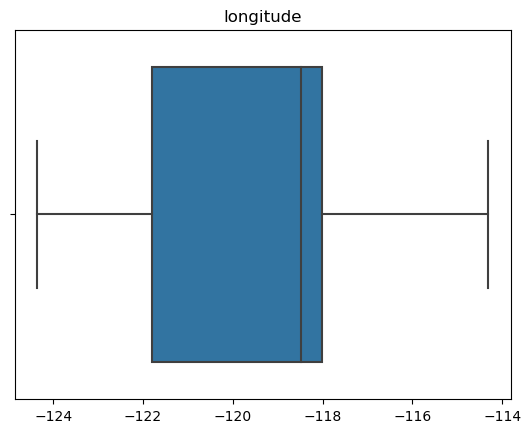

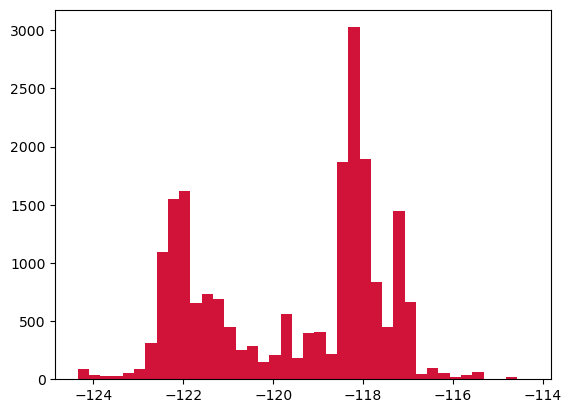

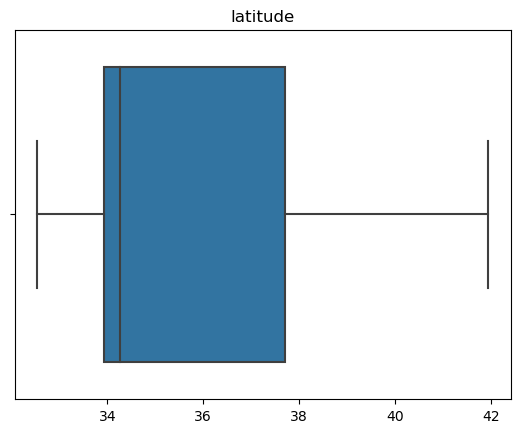

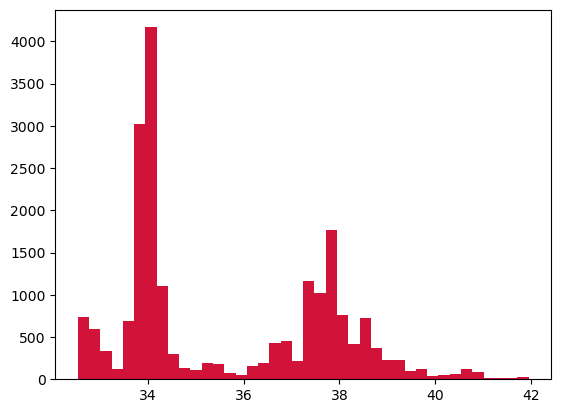

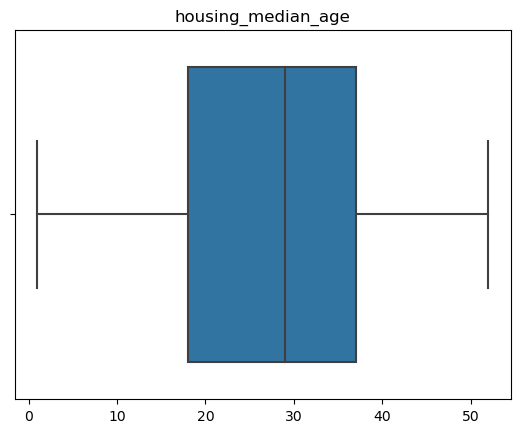

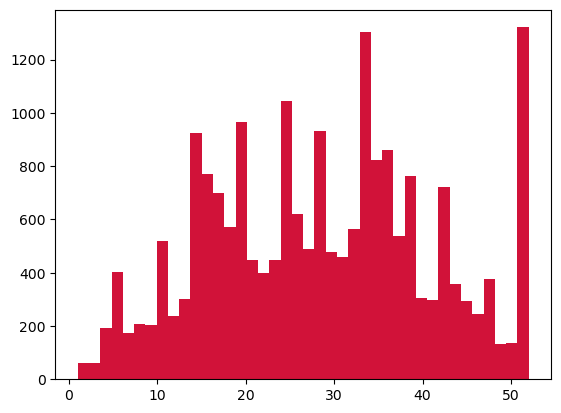

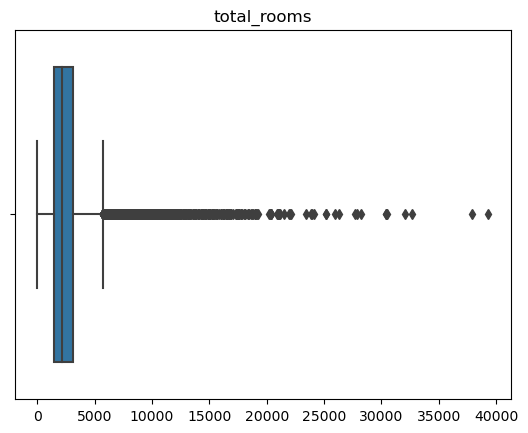

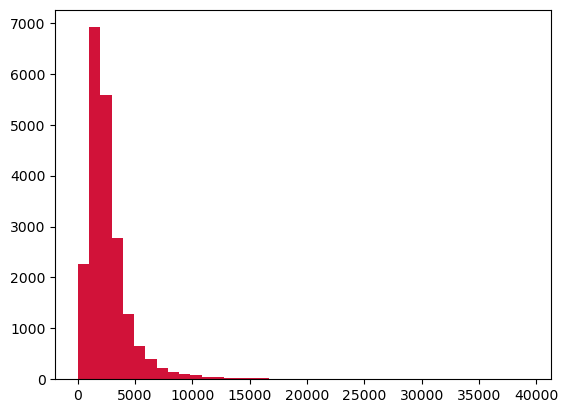

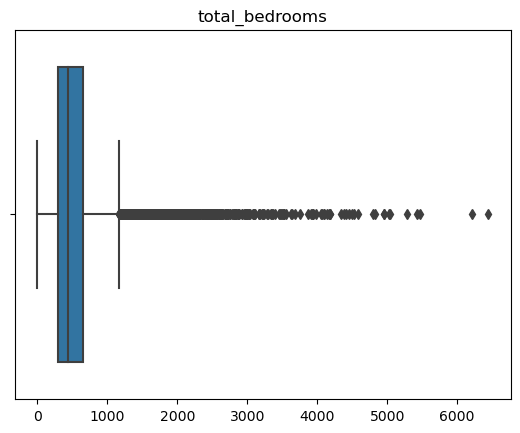

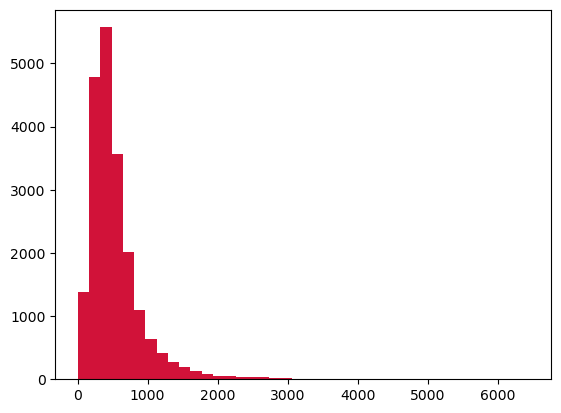

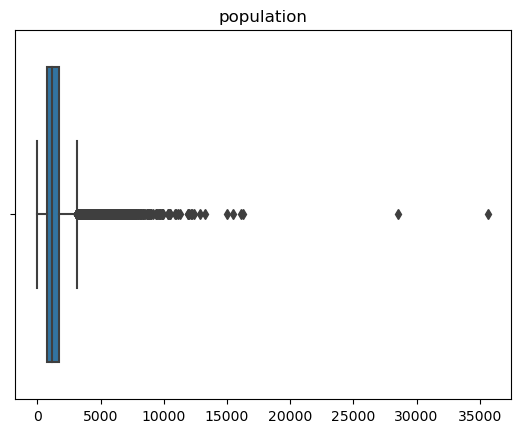

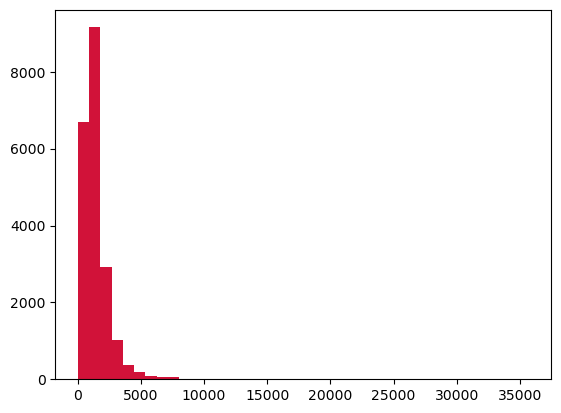

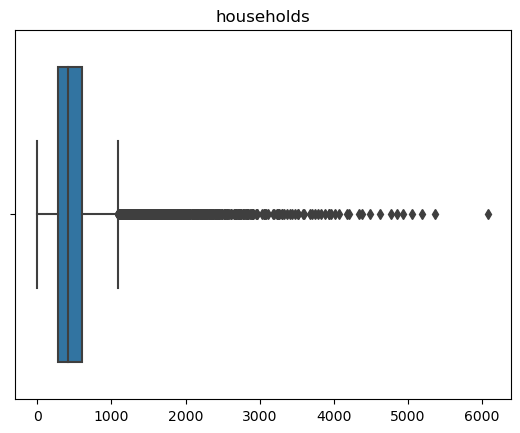

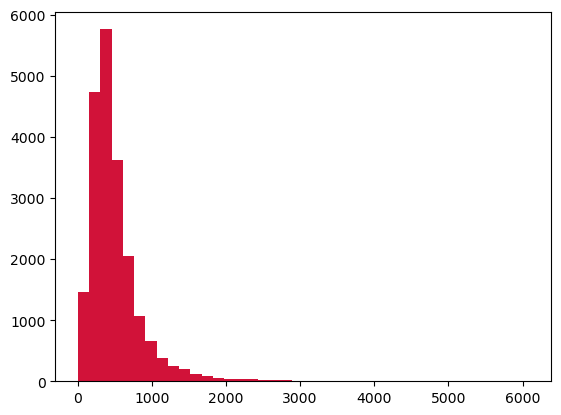

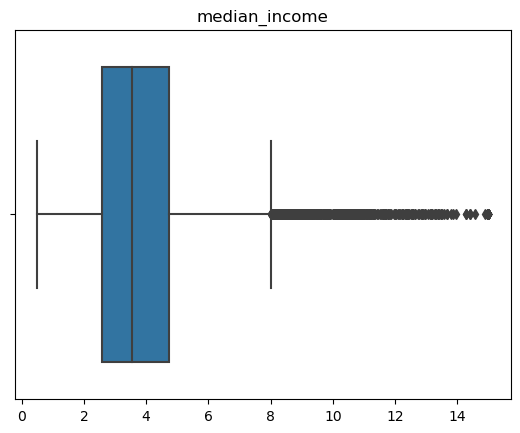

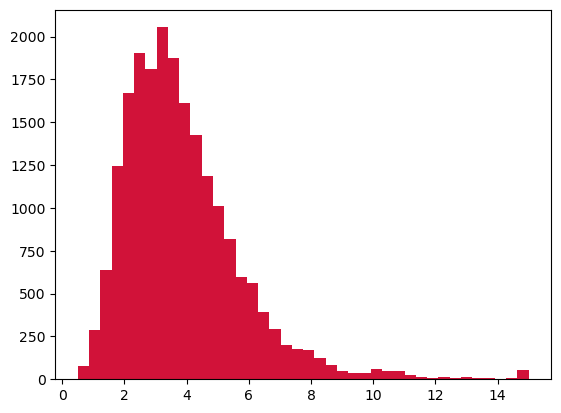

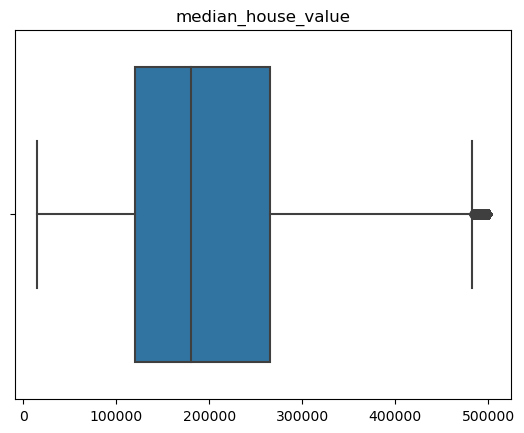

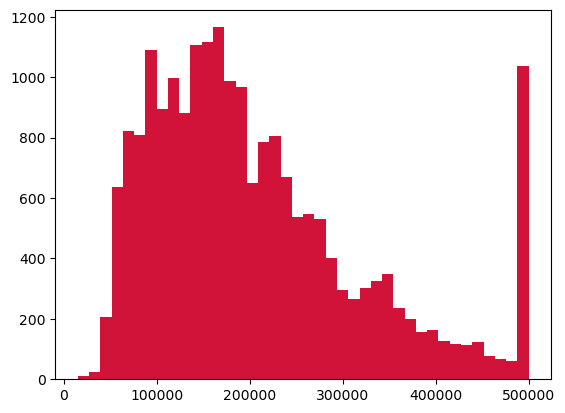

In [35]:
#loop over all the columns and draw outliers
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

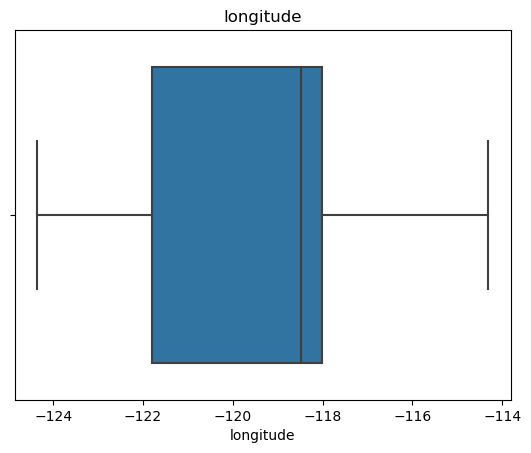

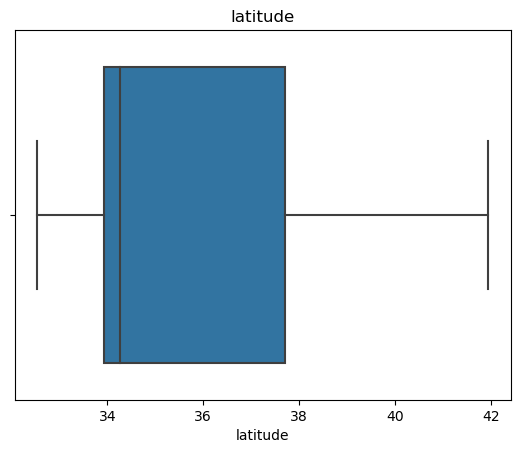

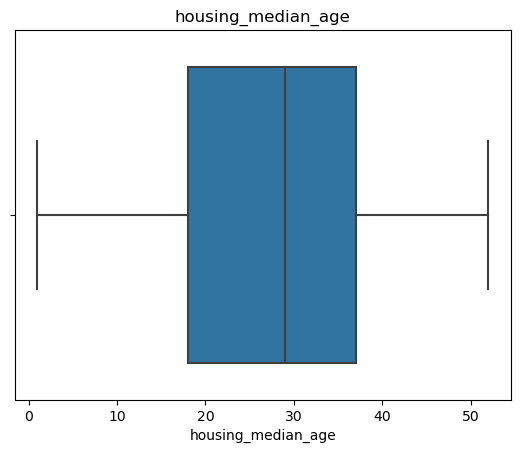

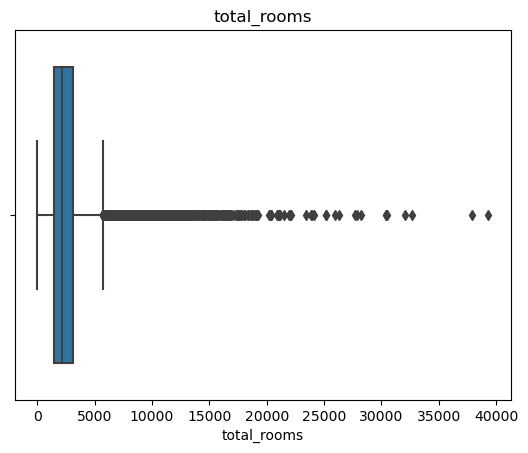

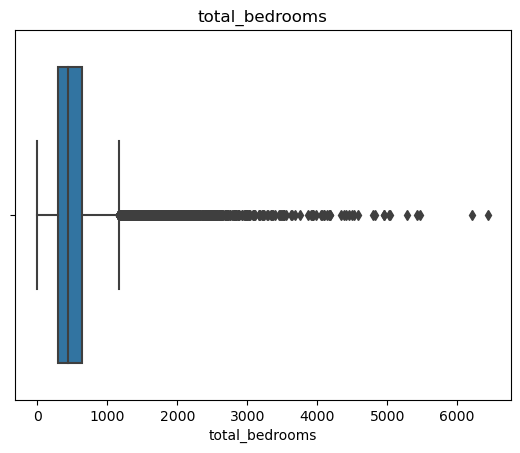

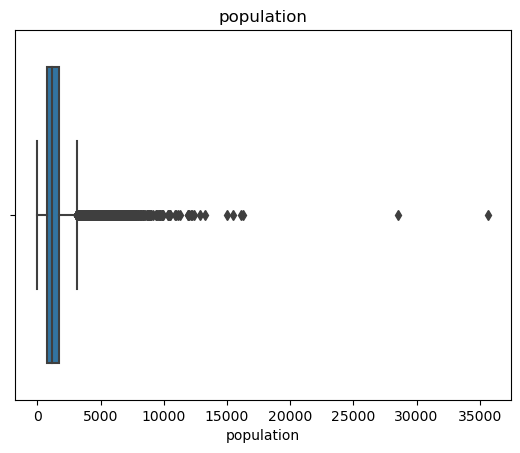

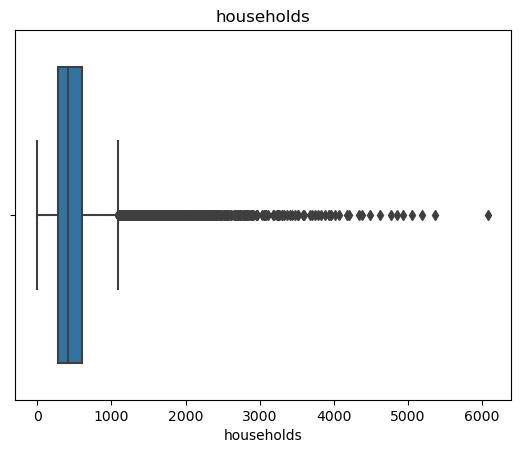

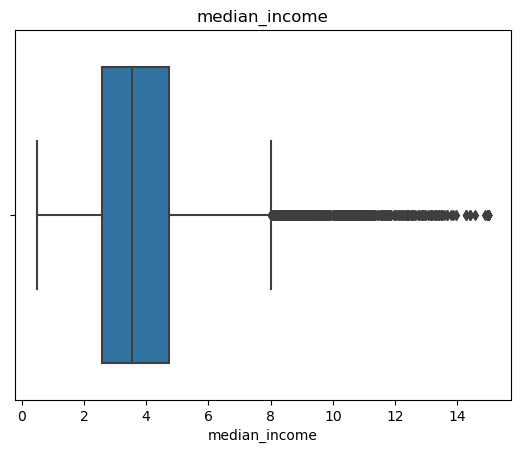

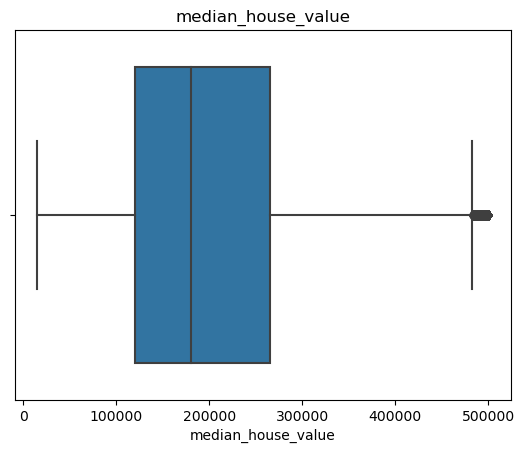

In [12]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df,x=col)
    
    plt.show()

for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)

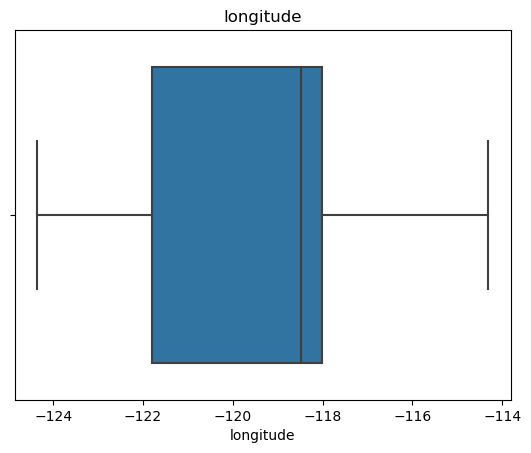

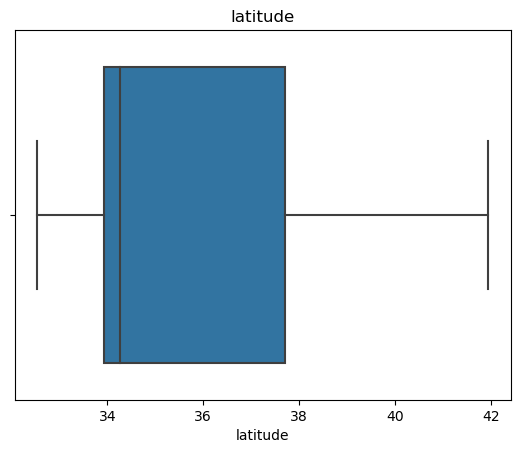

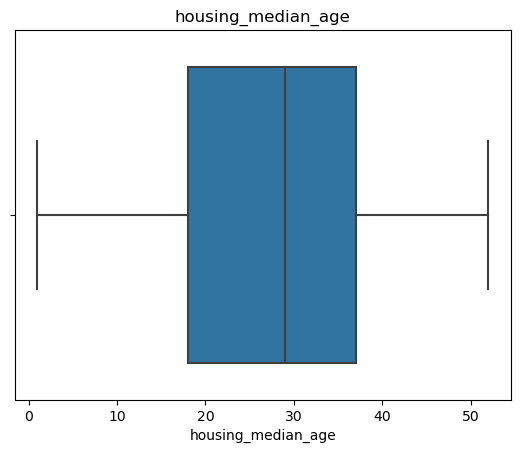

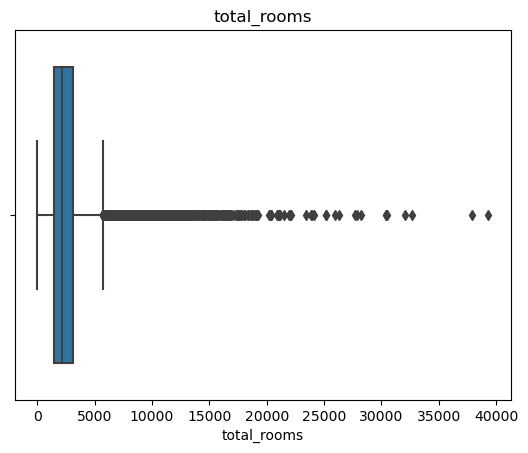

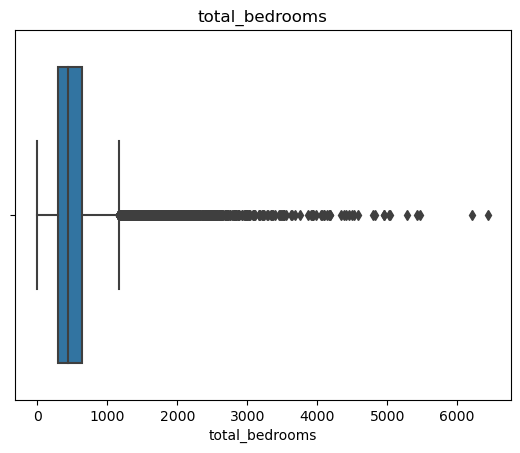

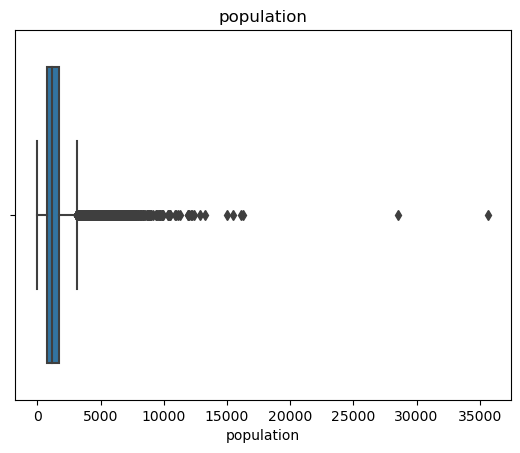

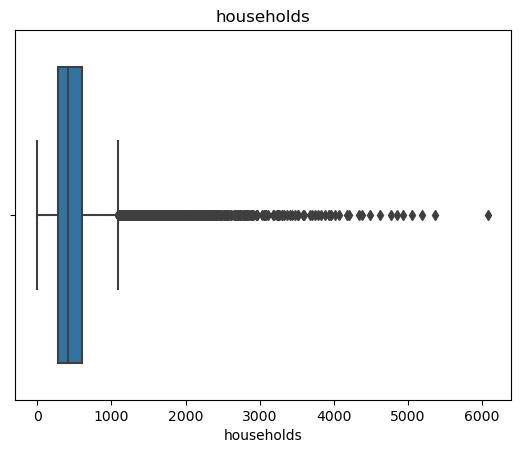

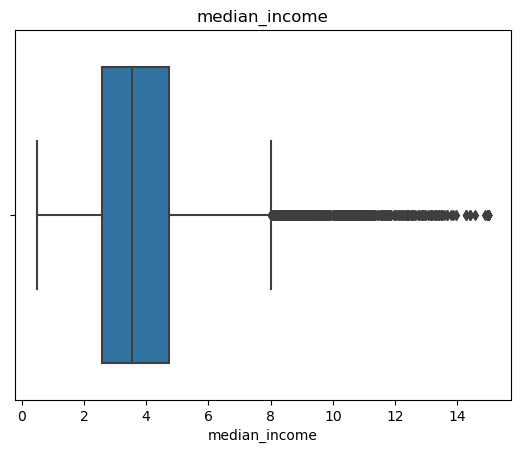

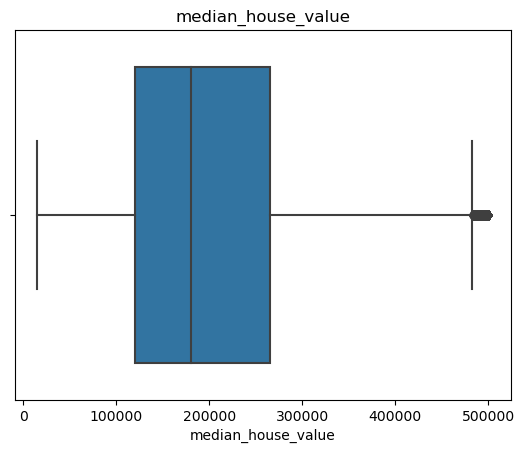

In [15]:
for i in df.select_dtypes(include = 'number'):
    plt.title(i)
    sns.boxplot(data = df, x= df[i])
    plt.show()

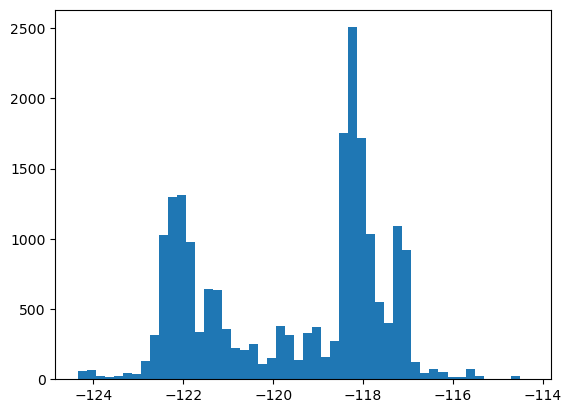

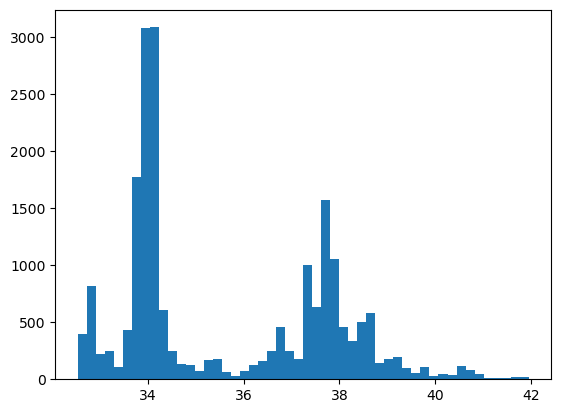

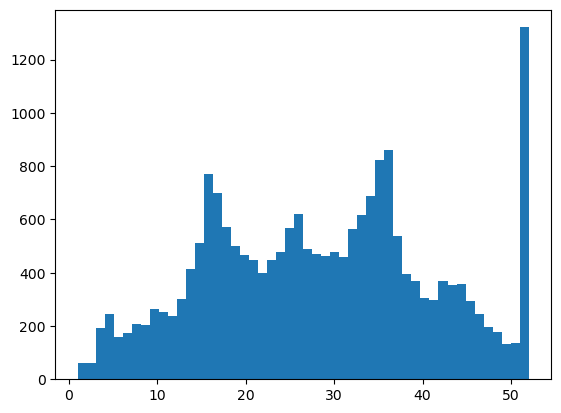

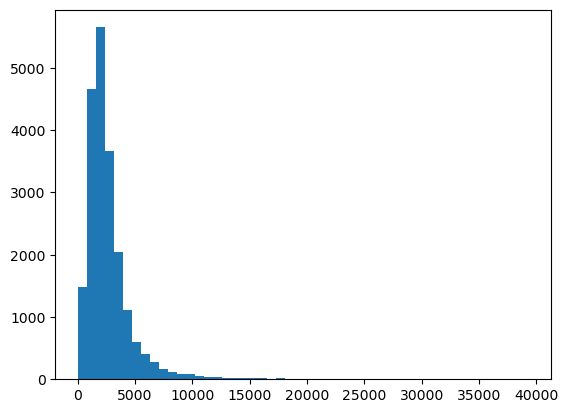

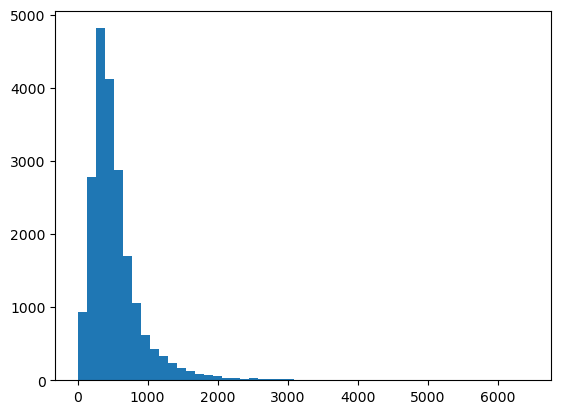

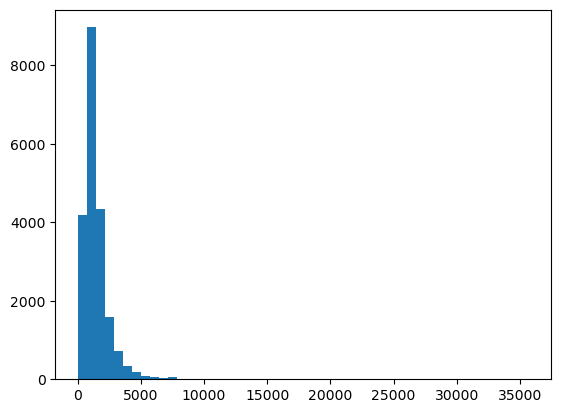

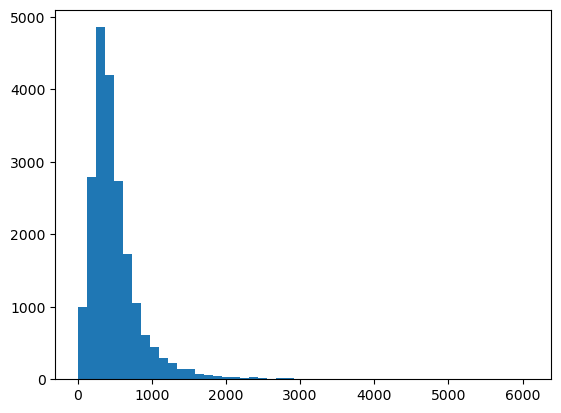

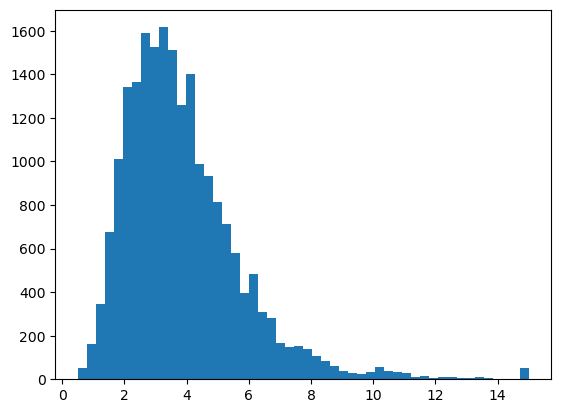

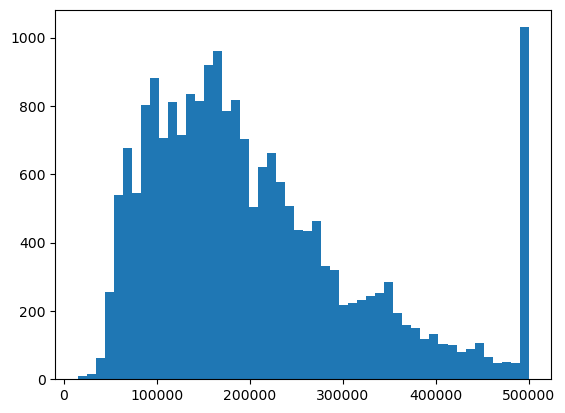

In [19]:
for i in df.select_dtypes(include = 'number'):
    plt.hist(x = df[i],bins=50)
    plt.show()

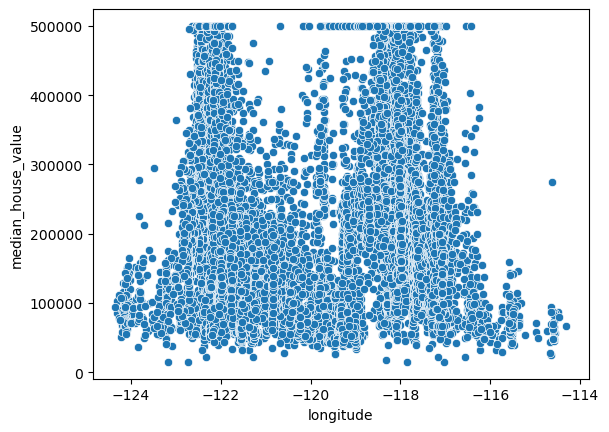

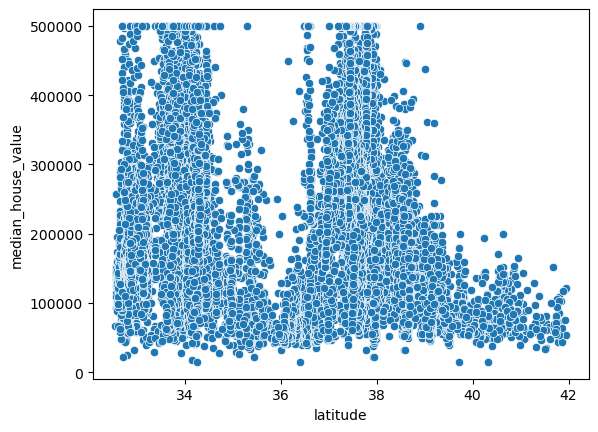

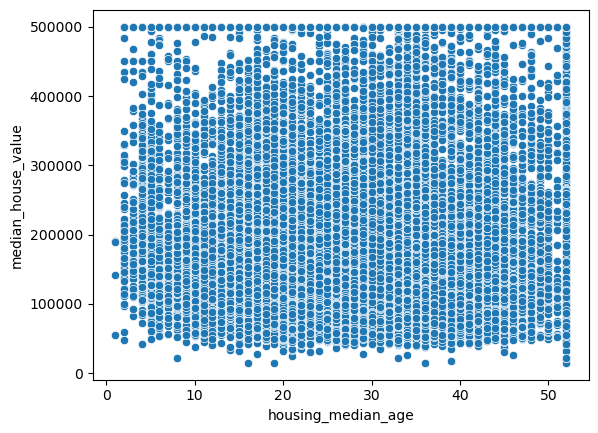

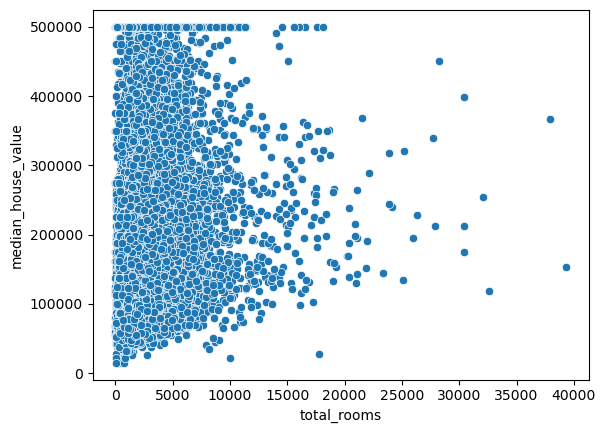

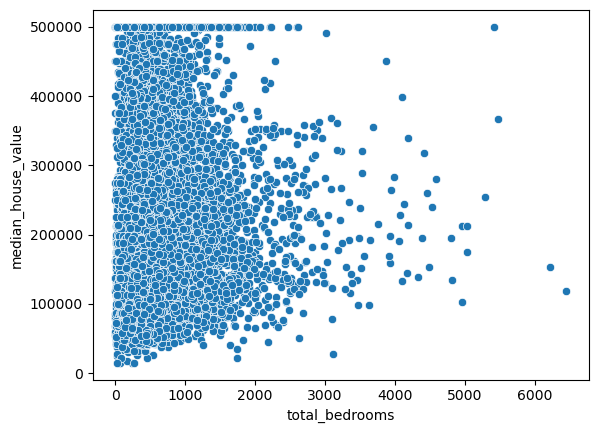

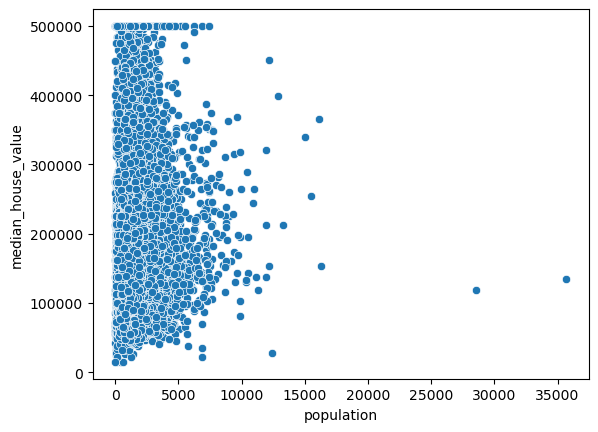

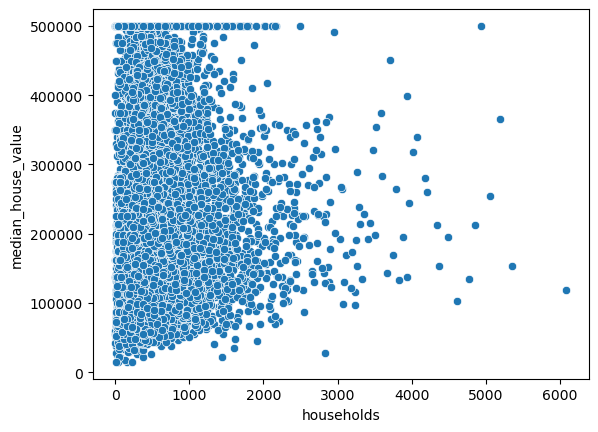

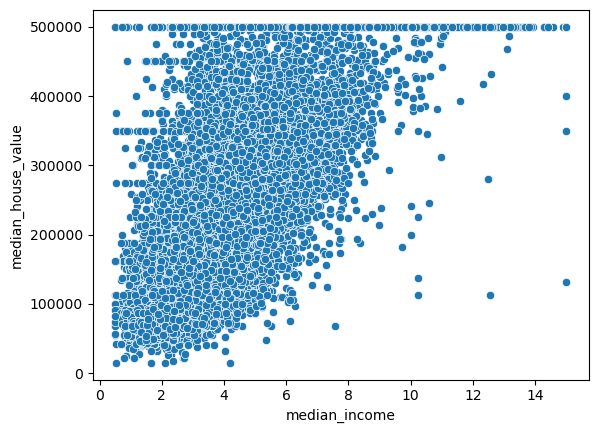

In [27]:
#check for correlation
column = []
for i in df.select_dtypes(include='number'):
    column.append(i)

column.remove('median_house_value')

for i in column:
    sns.scatterplot(data=df, x=i,y=df['median_house_value'])
    plt.show()

<Axes: >

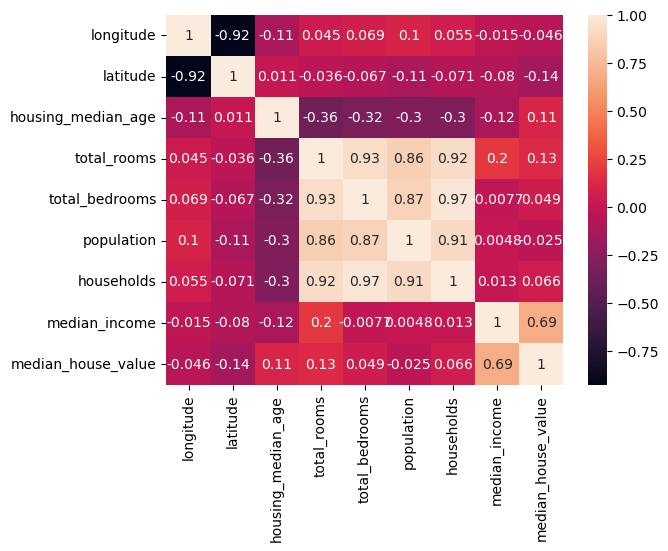

In [30]:
#correlation heatmap
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation,annot=True)

In [ ]:
def whiskers(col):
    `q1,q3 = np.percentile(col,[25,75])
